In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
#...
#Features used: Age, Sex, Blood Pressure, and Cholesterol of 20e patients.
#The classifier is built to find a proper drug for a new patient among 5 drugs.
#...

df = pd.read_csv('drug200.csv')
df


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
#Check data types
df.dtypes

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,float64
Drug,object


In [8]:
#Name of the columns
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [9]:
#Check for null values
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [10]:
#Check for duplicate values
df.duplicated().sum()

0

In [12]:
#Rename columns

df.rename(columns={'Na_to_K' : 'Sodium_to_Potassium','BP' : 'Blood_Pressure'},inplace=True)
df['Sex'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype(int)


<ipython-input-12-d01edee86c19>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)


In [13]:
df

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,23,Female,HIGH,HIGH,25,drugY
1,47,Male,LOW,HIGH,13,drugC
2,47,Male,LOW,HIGH,10,drugC
3,28,Female,NORMAL,HIGH,8,drugX
4,61,Female,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,Female,LOW,HIGH,12,drugC
196,16,Male,LOW,HIGH,12,drugC
197,52,Male,NORMAL,HIGH,10,drugX
198,23,Male,NORMAL,NORMAL,14,drugX


In [14]:
#Thống kê số lượng người thuộc 5 nhóm tuổi cao nhất
age_values = df['Age'].value_counts()
top_age = age_values.head(5)
df_top_age = pd.DataFrame({'Age' : top_age.index, 'Count': top_age.values})
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,39,6


<ipython-input-17-092b3fd82b71>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=x, data=data, palette=palette, ax=ax)
<ipython-input-17-092b3fd82b71>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=x, data=data, palette=palette, ax=ax)
<ipython-input-17-092b3fd82b71>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=x, data=data, palette=palette, ax=ax)
<ipython-input-17-092b3fd82b71>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

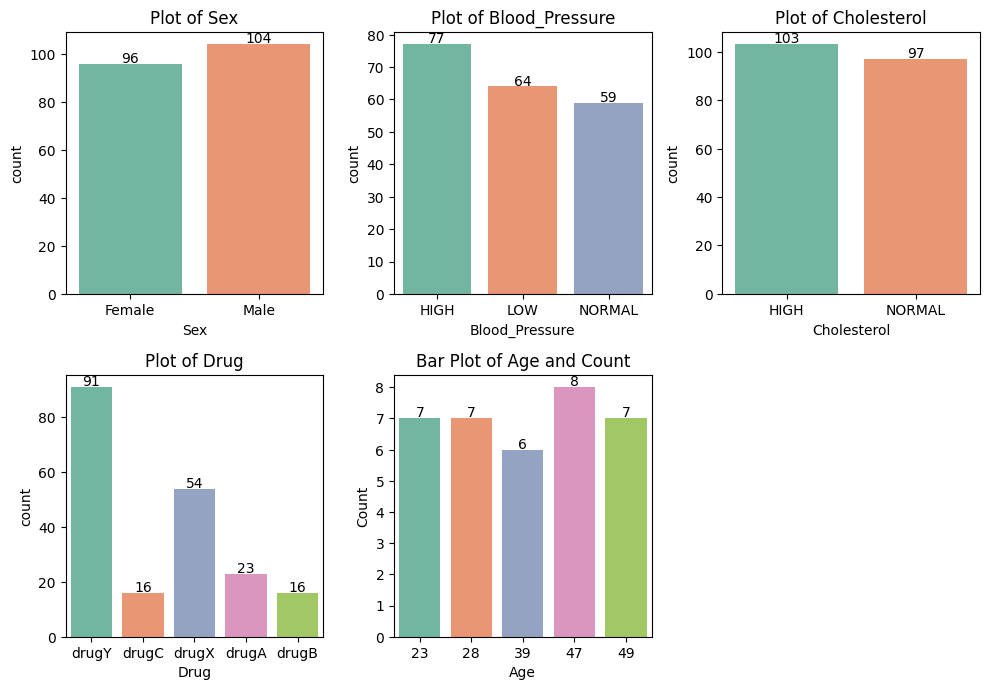

In [17]:
#EDA
def create_plot(ax, x, data, plot_type = 'count', y=None, palette = 'Set2'):
    if plot_type == 'count':
        plot = sns.countplot(x=x, data=data, palette=palette, ax=ax)
    elif plot_type == 'bar':
        plot = sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)

    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline',
                    fontsize=10, color='black',
                    xytext=(0, 1),
                    textcoords='offset points')
# Create the figure and subplots
plt.figure(figsize=(10, 10))

# Define plot configuration
plot_config = [
    {'x': 'Sex', 'data': df, 'plot_type': 'count'},
    {'x': 'Blood_Pressure', 'data': df, 'plot_type': 'count'},
    {'x': 'Cholesterol', 'data': df, 'plot_type': 'count'},
    {'x': 'Drug', 'data': df, 'plot_type': 'count'},
    {'x': 'Age', 'y': 'Count','data': df_top_age, 'plot_type': 'bar'}
]

#Loop through plot configurations to create subplots
for i, config in enumerate(plot_config):
    ax = plt.subplot(3, 3, i+1)
    create_plot(ax, **config)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


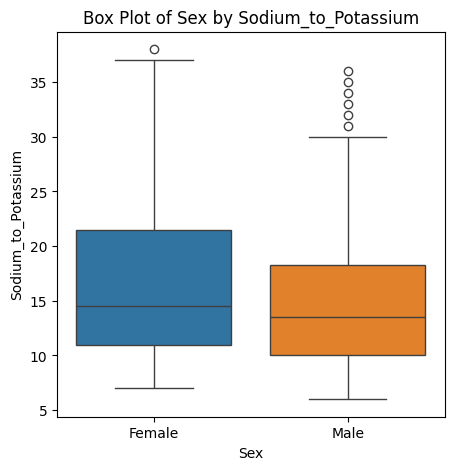

In [19]:
## Checking outiers detection through box plot
plt.figure(figsize=(5, 5))
sns.boxplot(x='Sex', y='Sodium_to_Potassium', data=df, hue='Sex')
plt.title('Box Plot of Sex by Sodium_to_Potassium')
plt.show()

In [25]:
# Feature selection
# Feature and target
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium
0,23,Female,HIGH,HIGH,25
1,47,Male,LOW,HIGH,13
2,47,Male,LOW,HIGH,10
3,28,Female,NORMAL,HIGH,8
4,61,Female,LOW,HIGH,18
...,...,...,...,...,...
195,56,Female,LOW,HIGH,12
196,16,Male,LOW,HIGH,12
197,52,Male,NORMAL,HIGH,10
198,23,Male,NORMAL,NORMAL,14


In [21]:
y

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [26]:
#OneHotEncoder
onehot_encoder_sex = OneHotEncoder(sparse_output=False)
one_hot_encoded = onehot_encoder_sex.fit_transform(x[['Sex']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex']))
x = pd.concat([x, one_hot_df], axis=1)
x = x.drop('Sex', axis=1) # Drop the original categorical columns

# Labelled encoder
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()
x['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(x['Blood_Pressure'])

x['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(x['Cholesterol'])
# Show features data
x

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
0,23,0,0,25,1.0,0.0
1,47,1,0,13,0.0,1.0
2,47,1,0,10,0.0,1.0
3,28,2,0,8,1.0,0.0
4,61,1,0,18,1.0,0.0
...,...,...,...,...,...,...
195,56,1,0,12,1.0,0.0
196,16,1,0,12,0.0,1.0
197,52,2,0,10,0.0,1.0
198,23,2,1,14,0.0,1.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [29]:
X_train

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
2,47,1,0,10,0.0,1.0
77,26,0,1,19,1.0,0.0
46,37,0,0,13,1.0,0.0
187,47,0,0,10,0.0,1.0
191,23,0,0,8,0.0,1.0
...,...,...,...,...,...,...
106,22,2,0,12,0.0,1.0
14,50,2,0,13,1.0,0.0
92,29,0,0,29,1.0,0.0
179,67,2,0,16,1.0,0.0


In [30]:
X_test

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
95,36,1,1,11,0.0,1.0
15,16,0,1,16,1.0,0.0
30,18,2,1,9,1.0,0.0
158,59,1,0,10,1.0,0.0
128,47,1,1,34,0.0,1.0
...,...,...,...,...,...,...
113,65,1,1,14,1.0,0.0
26,31,0,0,30,0.0,1.0
139,69,2,0,10,1.0,0.0
100,31,0,1,12,0.0,1.0


In [31]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [32]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [33]:
dtc.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

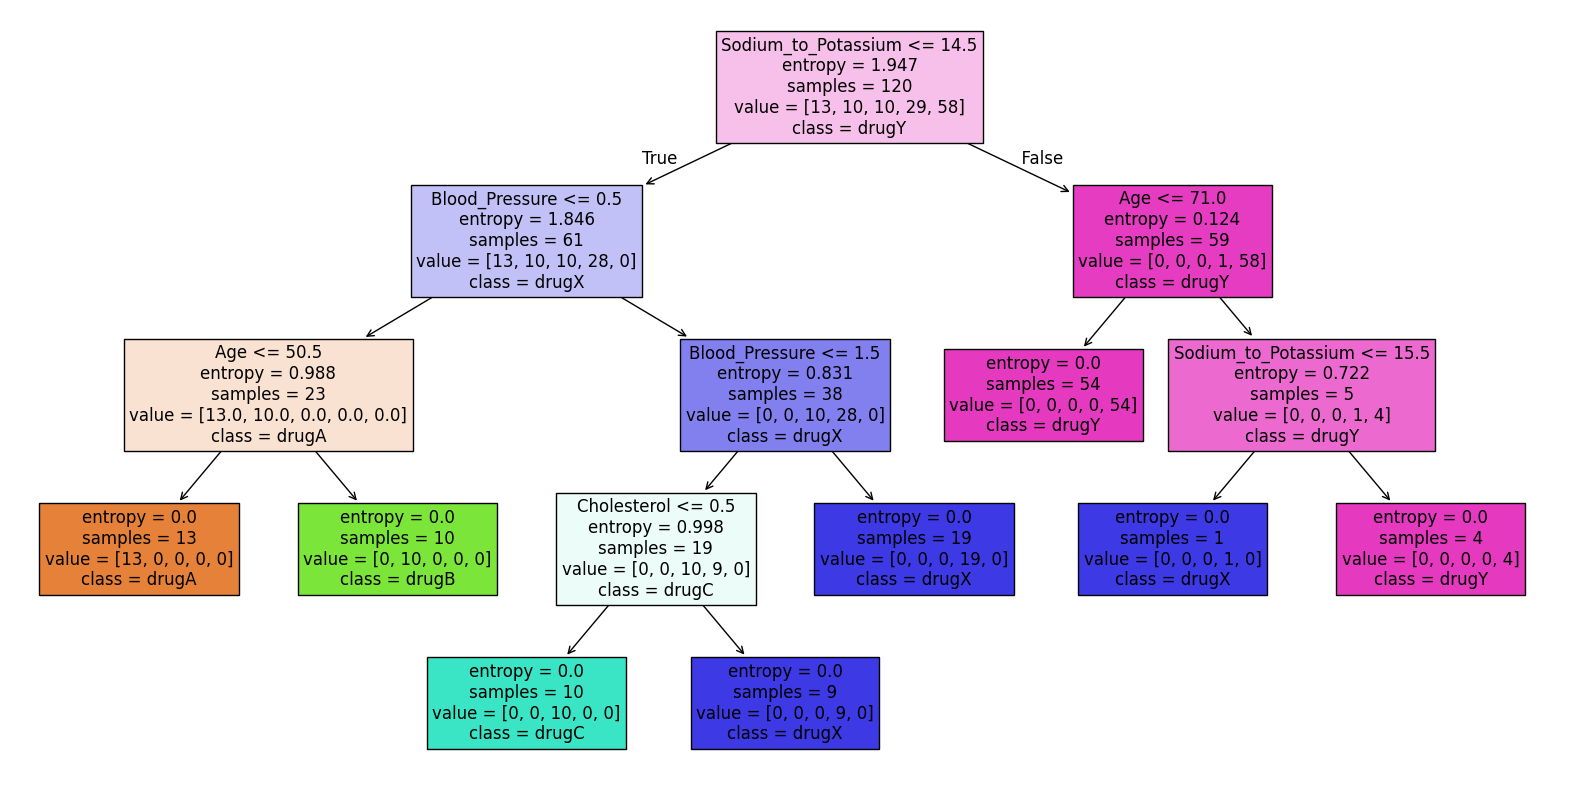

In [34]:
from sklearn.tree import plot_tree

feature_cols = X_train.columns

plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=feature_cols, class_names=dtc.classes_, fontsize = 12)
plt.show()

In [41]:
#Tính Entropy có trọng số (WE) và Infomation Gain khi phân tách Root thành Left - Right node

import pandas as pd
import numpy as np

def weighted_entropy(df, feature, target):
    """Calculates the weighted entropy for a given feature.

    Args:
        df: DataFrame containing the data.
        feature: Name of the feature column.
        target: Name of the target column.

    Returns:
        float: Weighted entropy value.
    """
    total_samples = len(df)
    weighted_entropy = 0

    for value in df[feature].unique():
        subset = df[df[feature] == value]
        subset_size = len(subset)
        entropy = 0
        for target_value in df[target].unique():
            p = len(subset[subset[target] == target_value]) / subset_size
            if p > 0:  # Avoid log(0) error
              entropy -= p * np.log2(p)
        weighted_entropy += (subset_size / total_samples) * entropy

    return weighted_entropy

def information_gain(df, feature, target):
    """Calculates the information gain for a given feature.

    Args:
      df: DataFrame containing the data.
      feature: Name of the feature column.
      target: Name of the target column.

    Returns:
        float: Information gain value.
    """

    entropy_before = 0
    for target_value in df[target].unique():
        p = len(df[df[target] == target_value]) / len(df)
        if p > 0: # Avoid log(0) error
          entropy_before -= p * np.log2(p)

    entropy_after = weighted_entropy(df, feature, target)
    information_gain = entropy_before - entropy_after
    return information_gain

# Example usage (assuming 'df', 'Drug' are already defined):
# Replace 'Age' with your desired feature for calculation
feature_to_analyze = 'Age'
target_variable = 'Drug'

we = weighted_entropy(df, feature_to_analyze, target_variable)
ig = information_gain(df, feature_to_analyze, target_variable)

print(f"Weighted Entropy for '{feature_to_analyze}': {we}")
print(f"Information Gain for '{feature_to_analyze}': {ig}")


Weighted Entropy for 'Age': 1.2652087787635078
Information Gain for 'Age': 0.7035715991901172


In [57]:
# prompt: Hãy tính IG của Root sau khi được phân tách thành left và right.

# Example usage (assuming 'df', 'Drug' are already defined):
# Replace 'Age' with your desired feature for calculation
feature_to_analyze = 'Age'  # Root node feature
target_variable = 'Drug'

we = weighted_entropy(df, feature_to_analyze, target_variable)
ig = information_gain(df, feature_to_analyze, target_variable)

print(f"Weighted Entropy for '{feature_to_analyze}': {we}")
print(f"Information Gain for '{feature_to_analyze}': {ig}")


Weighted Entropy for 'Age': 1.2652087787635078
Information Gain for 'Age': 0.7035715991901172


In [46]:
# Accuracy Score
# Predict the response for test dataset
y_test_pred = dtc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",100*metrics.accuracy_score(y_test, y_pred))

Accuracy: 98.75


In [47]:
# Tạo Confusion - Metric
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_test_pred)
cf_matrix

array([[10,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 25,  0],
       [ 0,  0,  0,  1, 32]])

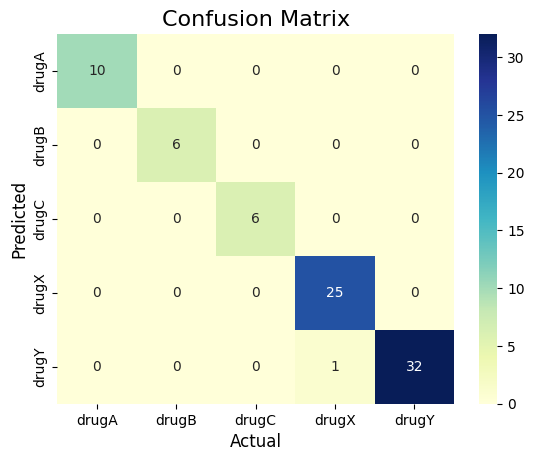

In [48]:
# Plot the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.ylabel('Predicted', fontsize=12)
plt.xlabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


In [50]:
# Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(accuracy)

# Precision
precision = precision_score(y_test, y_test_pred, average=None)
print(precision)

# Recall
recall = recall_score(y_test, y_test_pred, average=None)
print(recall)

# F1 Score
f1 = f1_score(y_test, y_test_pred, average=None)
print(f1)

# F0.5 scores
f0_5 = fbeta_score(y_test, y_test_pred, beta=0.5, average=None)
print(f0_5)

# F2 scores
f2 = fbeta_score(y_test, y_test_pred, beta=2, average=None)
print(f2)

0.9875
[1.         1.         1.         0.96153846 1.        ]
[1.         1.         1.         1.         0.96969697]
[1.         1.         1.         0.98039216 0.98461538]
[1.         1.         1.         0.96899225 0.99378882]
[1.         1.         1.         0.99206349 0.97560976]


In [51]:
# micro precision
micro_precision = precision_score(y_test, y_test_pred, average='micro')
print(micro_precision)

0.9875


In [52]:
# macro precision
macro_precision = precision_score(y_test, y_test_pred, average='macro')
print(macro_precision)

0.9923076923076923


In [53]:
from sklearn.metrics import classification_report
target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       0.96      1.00      0.98        25
       drugY       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [54]:
# prediction
age = 32
blood = 'HIGH'
blood_scaled = labelled_encoder_blood_pressure.transform([blood])

cholesterol = 'NORMAL'
cholesterol_scaled = labelled_encoder_cholesterol.transform([cholesterol])

Sodium_to_Potassium = 13

sex = 'Female'
sex_scaled = onehot_encoder_sex.transform([[sex]])

sex_scaled = sex_scaled.flatten()

feature_sample = np.array([age, blood_scaled[0], cholesterol_scaled[0], Sodium_to_Potassium, sex_scaled[0], sex_scaled[1]])

y_sample_pred = dtc.predict([feature_sample])
y_sample_pred

# => drugA

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugA'], dtype=object)

In [ ]:
# Sử dụng Grid Search dựa trên các siêu tham số trong mô hình như sau:
# max_depth chạy từ 2 đến 10 và max_leaf_nodes chạy từ 2 đến 10
# Sau đó, sẽ biểu đồ thể hiện sự thay đổi của độ đo accuracy trên tập train và test
# Từ đó đưa đến kết luận với siêu tham số điều chỉnh nào thì mô hình tốt nhất

In [ ]:
# Giả sử drugX là một loại thuốc đặc trị có tác dụng rất mạnh không tốt cho bệnh nhân (hạn chế sử dụng)
# tức là bệnh rất nghiêm trọng mới càn sử dụng
# hãy đánh giá các giá trị bên dưới trên nhóm phân lớp drugX và
# cho biết ta cần tối ưu giá trị nào khi cải thiện mô hình có điều kiện là hạn chế cấp thuốc drugX?